# Use a pretrained model from from Keras
Import weight matrices from HDF5-files exported from Keras/Tensorflow

### Keras/Tensorflow side:

```Python
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow import keras

mdl = VGG16(weights="imagenet")
mdl.save_weights("vgg16keras.h5", save_format="h5")
```

... that's it.

In [1]:
using HDF5
using Knet, CUDA
using Images, Colors
using NNHelferlein
using Augmentor

In [2]:
model_file = "vgg16keras.h5"
h = h5open(model_file)

🗂️ HDF5.File: (read-only) vgg16keras.h5
├─ 🏷️ backend
├─ 🏷️ keras_version
├─ 🏷️ layer_names
├─ 📂 block1_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_pool
│  └─ 🏷️ weight_names
├─ 📂 block2_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_pool
│  └─ 🏷️ weight_names
├─ 📂 block3_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv3
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv3
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_pool
│  └─ 🏷️ weight_names
├─ 📂 block4_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block4_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0

In [3]:
read(h, "fc1/fc1/kernel:0") # check what is in object

4096×25088 Matrix{Float32}:
  1.97458f-5   -0.00535125    0.000660626  …   1.10183f-5    0.000667527
  0.000353087  -0.0015713     0.00130033      -0.000647103   0.00182666
 -0.00183277   -0.00033636   -0.00129854      -0.00358047    0.0011026
 -3.85481f-5   -0.000247837  -0.000396012     -0.00428682    0.000606827
  0.00337623   -0.00188352   -0.000663638     -0.00599886   -0.000433553
 -0.000700199  -0.000802754   0.00458611   …  -7.76628f-5    0.000583719
  0.00221046   -0.00161408    0.00132863       0.00287604    0.00198438
  0.00238029    0.000441875   0.00432081       0.00120285   -0.00135578
 -0.000586961  -0.00328703   -0.000340907      0.00171487   -0.00316715
 -0.001691     -0.00165822   -0.00393896       0.00163746    0.001835
 -0.000141186   0.00177961    0.000834859  …   0.00104409   -0.00248806
 -0.000138558  -0.000913218   0.00015988       0.00326626   -0.00259449
  0.00317017    0.00240278   -0.000886704      0.00354805   -0.00221558
  ⋮                                

### Build VGG net:

In [4]:
vgg = Classifier(
            Conv(h, "block1_conv1", padding=1),
            Conv(h, "block1_conv2", padding=1),
            Pool(),
            Conv(h, "block2_conv1", padding=1),
            Conv(h, "block2_conv2", padding=1),
            Pool(),
            Conv(h, "block3_conv1", padding=1),
            Conv(h, "block3_conv2", padding=1),
            Conv(h, "block3_conv3", padding=1),
            Pool(),
            Conv(h, "block4_conv1", padding=1),
            Conv(h, "block4_conv2", padding=1),
            Conv(h, "block4_conv3", padding=1),
            Pool(),
            Conv(h, "block5_conv1", padding=1),
            Conv(h, "block5_conv2", padding=1),
            Conv(h, "block5_conv3", padding=1),
            Pool(),
            PyFlat(python=true),
            Dense(h, "fc1", actf=relu),
            Dense(h, "fc2", actf=relu),
            Dense(h, "predictions", actf=identity))  ;

Generating layer from hdf with kernel (3,3), 3 channels, 64 kernels.
Generating layer from hdf with kernel (3,3), 64 channels, 64 kernels.
Generating layer from hdf with kernel (3,3), 64 channels, 128 kernels.
Generating layer from hdf with kernel (3,3), 128 channels, 128 kernels.
Generating layer from hdf with kernel (3,3), 128 channels, 256 kernels.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels.
Generating layer from hdf with kernel (3,3), 256 channels, 512 kernels.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels.
Generating relu Dense layer from hdf with 4096 neurons and 25088 fan-i

# Predict images:

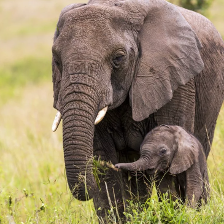

In [5]:
load(joinpath(NNHelferlein.DATA_DIR, "elecat_224", "ele-224.png"))

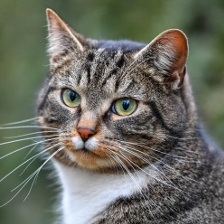

In [6]:
load(joinpath(NNHelferlein.DATA_DIR, "elecat_224", "cat-224.png"))

In [7]:
imgs = mk_image_minibatch(joinpath(NNHelferlein.DATA_DIR, "elecat_224"), 16, train=false, pre_proc=preproc_imagenet)

ImageLoader("/home/andreas/.julia/dev/NNHelferlein/data/elecat_224", ["/home/andreas/.julia/dev/NNHelferlein/data/elecat_224/cat-224.png", "/home/andreas/.julia/dev/NNHelferlein/data/elecat_224/ele-224.png"], [0, 0], ["unknwon_class"], 16, true, [1, 2], false, nothing, NNHelferlein.preproc_imagenet, false, nothing)

In [8]:
pipl = CropRatio(ratio=1.0) |> Resize(224,224)
imgs1 = mk_image_minibatch("../data/elecat", 1, train=false, aug_pipl=pipl, pre_proc=preproc_imagenet)

ImageLoader("../data/elecat", ["../data/elecat/cat.jpg", "../data/elecat/elephant.jpg"], [0, 0], ["unknwon_class"], 1, true, [1, 2], false, 2-step Augmentor.ImmutablePipeline:
 1.) Crop to 1:1 aspect ratio
 2.) Resize to 224×224, NNHelferlein.preproc_imagenet, false, nothing)

In [9]:
x = first(imgs1)

224×224×3×1 CuArray{Float32, 4, CUDA.Mem.DeviceBuffer}:
[:, :, 1, 1] =
 83.061  85.061  87.061  87.061  …  -10.939   18.061   13.061   -7.939
 83.061  83.061  87.061  87.061       9.061  -25.939  -16.939   14.061
 83.061  84.061  86.061  88.061      25.061   -5.939   13.061  -11.939
 83.061  84.061  86.061  88.061     -38.939    6.061    8.061  -49.939
 82.061  86.061  89.061  89.061      15.061   10.061  -29.939  -42.939
 86.061  88.061  91.061  91.061  …   -8.939  -19.939  -29.939   -7.939
 85.061  89.061  92.061  92.061      71.061   38.061    4.061   10.061
 86.061  91.061  94.061  94.061      36.061   29.061   22.061  -18.939
 85.061  90.061  93.061  93.061      50.061   69.061   94.061   84.061
 87.061  89.061  91.061  91.061     -18.939  -12.939   45.061   40.061
 85.061  87.061  91.061  91.061  …  -34.939  -19.939  -22.939  -24.939
 86.061  87.061  91.061  90.061     -32.939   -2.939  -16.939  -62.939
 85.061  86.061  91.061  91.061      -8.939   -4.939  -21.939  -34.939
  ⋮   

In [10]:
vgg(x)

1000×1 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
  3.1840692
 -1.2339789
 -2.3363798
  0.24217273
  0.59770685
  1.9764066
  2.3527672
  3.0538979
  6.434788
  7.2689505
 -0.30669558
 -1.0786059
  3.0680456
  ⋮
 -0.7248295
 -1.2016709
 -1.2554657
 -1.3335171
 -1.7087704
  1.7222964
  0.23591371
  1.9462851
  1.862537
  2.591751
  1.0724394
 -0.39357528

Use predict from NNHelferlein-Package:   
(ImageNet class-numbers differs by 1, because they are 0..999)

In [11]:
y = predict_imagenet(vgg, data=imgs1)

top-5 hits for sample 1: [283, 282, 286, 288, 723]
softmax       #   class label
   0.00     283   " 282: 'tiger cat'"
   0.00     282   " 281: 'tabby, tabby cat'"
   0.00     286   " 285: 'Egyptian cat'"
   0.00     288   " 287: 'lynx, catamount'"
   0.00     723   " 722: 'ping-pong ball'"
 
top-5 hits for sample 2: [387, 102, 386, 347, 24]
softmax       #   class label
   0.00     387   " 386: 'African elephant, Loxodonta africana'"
   0.00     102   " 101: 'tusker'"
   0.00     386   " 385: 'Indian elephant, Elephas maximus'"
   0.00     347   " 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis'"
   0.00      24   " 23: 'vulture'"
 


1000×2 Matrix{Float32}:
 2.5041f-9    5.11481f-7
 1.16609f-8   6.16731f-9
 2.68509f-10  2.048f-9
 1.29356f-9   2.69886f-8
 2.00418f-10  3.85112f-8
 2.02758f-9   1.52879f-7
 5.87304f-11  2.22741f-7
 2.45302f-9   4.49052f-7
 1.55643f-9   1.32008f-5
 3.59046f-9   3.03998f-5
 1.0714f-9    1.55887f-8
 1.37149f-9   7.204f-9
 4.09968f-9   4.55451f-7
 ⋮            
 4.99069f-8   1.02616f-8
 2.8594f-8    6.36981f-9
 1.83699f-9   6.0362f-9
 9.83345f-10  5.58299f-9
 8.47979f-11  3.83616f-9
 1.90231f-10  1.18574f-7
 1.60116f-10  2.68202f-8
 3.42243f-10  1.48343f-7
 3.42901f-10  1.36426f-7
 5.34133f-10  2.82872f-7
 1.08016f-5   6.191f-8
 7.72216f-7   1.42915f-8